In [1]:
import numpy as np
import math

In [2]:
n= 3
np.random.seed(1)
alpha = 0.5
T= 1000
m = np.random.uniform(0, 3, n)
sig = np.random.uniform(2,2,n)
def bandit(k):
    return np.random.normal(m[k], sig[k])
bandit(0)

    
    

0.1947225095808105

In [3]:

np.random.seed(0)
total_reward = 0
for t in range(T):
    #random policy
    k = np.random.choice(range(n))
    reward = bandit(k)
    #print(k, reward)
    total_reward += reward
print(total_reward)

1124.8605610992163


In [4]:
# epsilon greedy when it wieghts over entire history for constant average value
def epsilon_greedy(epsilon):
    weights = np.zeros(n)
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights)
        times[k] += 1
        reward = bandit(k)
        weights[k] += 1/times[k]*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
    return (total_reward, rewards)

#print(weights/times

In [5]:
# epsilon greedy when uses upper bound selection for its greedy action
# I used the method that remembered all past values for this, 
#   since the greedy action selection also seems to depend on how many times the action was selected
#   the textbook talks about how it may struggle with non-stationary problems, 
#   so I compared it in a situation where it may be used
c = 1
def epsilon_greedy_upper_bound(epsilon):
    graphs = []
    weights = np.zeros(n) 
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)
    
    

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights + c*np.sqrt(np.log(t)/times))
        times[k] += 1
        reward = bandit(k)
        weights[k] += 1/times[k]*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
        graphs.append(weights.copy())
    return (total_reward, rewards, graphs)
(p4, p4r, graphs) = epsilon_greedy_upper_bound(.1)
print(p4)
#print(weights/times

1945.6365001473418


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


In [6]:
# original version used in class when it remembers all past instances and averages them equally as well
def epsilon_greedy_old(epsilon):
    weights = np.zeros(n)
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights/times)
        times[k] += 1
        reward = bandit(k)
        weights[k] += reward
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
    return (total_reward, rewards)

#print(weights/times

In [7]:
randseed = 3
np.random.seed(randseed)
(p1, p1r) = epsilon_greedy(0.1)
np.random.seed(randseed)
(p2, p2r) = epsilon_greedy_old(0.1)
np.random.seed(randseed)
(p3, p3r, graphs) = epsilon_greedy_upper_bound(.1)

print(p1)
print(p2)
print(p3)

1822.5969224511778
1823.1660144939597
1942.3638925686173


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


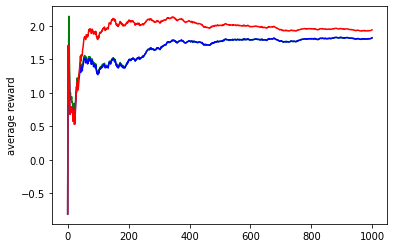

In [8]:
import matplotlib.pyplot as plt
plt.plot(p1r, color="green")# recent memory
plt.plot(p2r, color="blue") # full memory
plt.plot(p3r, color="red")  # upper bound
plt.ylabel('average reward')
plt.show()


(3, 1000)


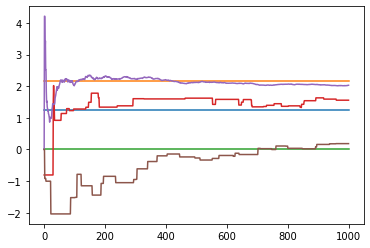

In [9]:
#shows the choices the algorithm made in the graph relative to the actual values of the actions.
for x in range(n):
    pl = np.zeros(T)
    for y in range(T):
        pl[y] = m[x]
    plt.plot(pl)

graarr = np.array(graphs).T
print(np.shape(graarr))
for x in graarr:
    plt.plot(x)
plt.show()